# Multivariate Regression Model and Logistic Regression Model to predict Credit Card Default rates in Taiwan.

## Presented by: Sanju Timilsina

#Data Source: https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients

# Metadata: 
Dataset Characteristics: Multivariate 
Number of Columns: 24
Number of Rows: 30000
Domain: Banking

Attribute Information:
This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. 
This study reviewed the literature and used the following 23 variables as explanatory variables:
X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her 
        family (supplementary) credit.
X2: Gender (1 = male; 2 = female).
X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).
X4: Marital status (1 = married; 2 = single; 3 = others).
X5: Age (year).
X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005)
    as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August,
        2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status 
        is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment
            delay for eight months; 9 = payment delay for nine months and above.
X12-X17: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount 
    of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005.
X18-X23: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in 
 August, 2005; . . .;X23 = amount paid in April, 2005.



# Problem Statement: 
"How can we build a model with at least 50% accuracy to identify individuals that are likely to default on 
their credit card through a systematic analysis of their banking records from April to September of 2005"

# 1) Libraries Imports

In [106]:
# for data manupulation
import pandas as pd
import numpy as np

# for Visualization
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.dates as md 
from matplotlib.dates import DateFormatter
%matplotlib inline 
import seaborn as sns

# for modeling
import statsmodels.api as sm 

import os

import warnings
warnings.filterwarnings('ignore')



## Hiding codes

In [40]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

# 2) Data import

In [41]:
# Importing data file from PC
#pd.read_excel('tmp.xlsx', index_col=None, header=None) 

os.getcwd()
os.listdir()

['Capstone 2 Credit card default of clients in Taiwan.ipynb',
 'Credit_Card_Defaults.xls',
 'Credit card default 2.ipynb',
 '.ipynb_checkpoints']

In [42]:
# Data import with header = 2nd row
raw_df = pd.read_excel('Credit_Card_Defaults.xls', header =1)

# Exploratory Data Analysis

In [43]:
raw_df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [44]:
# Dropping 1st column
df = raw_df.drop(columns = ['ID'], axis = 1) 
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [45]:
df.shape # gives number of rows and columns

(30000, 24)

In [46]:
df.info() # gives data structure and names of columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
LIMIT_BAL                     30000 non-null int64
SEX                           30000 non-null int64
EDUCATION                     30000 non-null int64
MARRIAGE                      30000 non-null int64
AGE                           30000 non-null int64
PAY_0                         30000 non-null int64
PAY_2                         30000 non-null int64
PAY_3                         30000 non-null int64
PAY_4                         30000 non-null int64
PAY_5                         30000 non-null int64
PAY_6                         30000 non-null int64
BILL_AMT1                     30000 non-null int64
BILL_AMT2                     30000 non-null int64
BILL_AMT3                     30000 non-null int64
BILL_AMT4                     30000 non-null int64
BILL_AMT5                     30000 non-null int64
BILL_AMT6                     30000 non-null int64
PAY_AMT1                

In [47]:
df.describe() # gives descriptive statistics of data

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [48]:
# Changing name of Default Paymnet next month into def_pay
df.rename(columns ={'default payment next month':'def_pay'}, inplace = True)
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,def_pay
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


## Exploratory Data Analysis : Visualization

In [49]:
#sns.pairplot(df, hue = 'def_pay')

In [50]:
df['def_pay'].value_counts() 

0    23364
1     6636
Name: def_pay, dtype: int64

## 1) Limit Balance Vs Education

In [51]:
#sns.barplot(data = df, x = 'EDUCATION',y = 'LIMIT_BAL')
# Barplot for stdev of different Education levels
#sns.barplot(data = df, x = 'EDUCATION',y = 'LIMIT_BAL', estimator = np.std)

## Education vs Limit balance when default payment == 0(No) and 1(Yes), (Education (1 = graduate school; 2 = university; 3 = high school; 4 = others)
Key Insights: Box plot of Education vs Limit balance indicates that the median of limit balance for both Default and Not default cases  is higher for clients who have graduate degrees. Due to the imbalanced data structure, where number of cases with not default is ~16,728 counts higher in not default group we can also see increasing varience in distribution of data for not_default group. Clients with High School degree had comparatively lower credit limit than other groups for both default and not default.

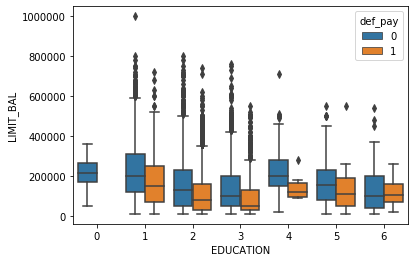

In [52]:
# Box plot for Limit balance Vs Education and seperated by default paymnet (0(No),1(Yes))

sns.boxplot(data = df, x = 'EDUCATION',y = 'LIMIT_BAL', hue = 'def_pay')

In [53]:
##Insights: 

In [54]:
#Violinplot of EDUCATION vs limit balance w.r.t default payment
#sns.violinplot(data = df, x = 'EDUCATION',y = 'LIMIT_BAL', hue = 'def_pay', split = True)
# Strip plot for Education vs Limit balance w.r.t default payment
#sns.stripplot(data = df, x = 'EDUCATION',y = 'LIMIT_BAL',jitter = True, hue = 'def_pay', split = True)

## 2) Limit Balance Vs SEX | Gender (1 = male; 2 = female) default payment 0(No) and 1(Yes)
Key Insights: Limit balance seems to be ~50,000 higher for clients who have not defaulted their paymnets (both male and female)which could be due to significantly higher number of cases for not default group. As, per limit balance both male and female had approxmately equal amount of credit amounts in both default and not_default cases. Which also indicates that there was so disparity in limit balance w.r.t gender. However, Overall destribution of data is much skewed for female than for male as there are more number of outliers in female than in male. Which might be affected due to other various factors like job stability, education levels and income.

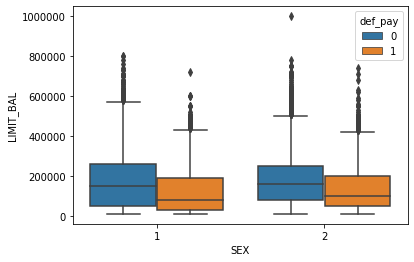

In [55]:
# Box plot for SEX vs Limit balance and seperated by default paymnet (0,1)
sns.boxplot(data = df, x = 'SEX',y = 'LIMIT_BAL', hue = 'def_pay')

## 3) Limit Balance Vs Marriage | Marital status (1 = married; 2 = single; 3 = others) 
Key Insights: With a median of ~$175,000 Limit Balance is comparatively higher in clients who is Married. Although, the graph shows higher limits for not default group in comparasion to default groups, we should also consider the imbalance structure of dataset where number of cases for not_default is significantly higher than that of default cases.

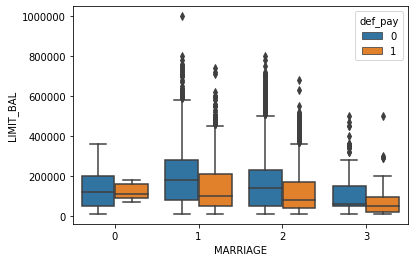

In [56]:
# Box plot for Marriage vs Limit balance and seperated by default paymnet (0(No),1(yes))

sns.boxplot(data = df, x = 'MARRIAGE',y = 'LIMIT_BAL', hue = 'def_pay')

In [57]:
#Violinplot of Marriage vs limit balance w.r.t default payment
#sns.violinplot(data = df, x = 'MARRIAGE',y = 'LIMIT_BAL', hue = 'def_pay', split = True)

## 4)Limit Balancce Vs Age  in Years.
Key Insights: Distribution of not Default pay is widely spread where as in the case of  default pay, with the exceptions of few outliers most of the data are clustered tightly signifying the lone amount is less varied in default pay specially within age group 25-45 yrs. Limit balance is higher in age group from 25 to 45 years old. 

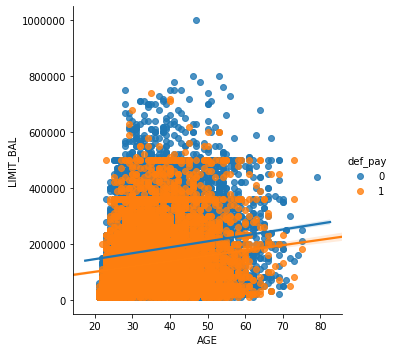

In [58]:
# linear plot chart AGE Vs Limit balance
sns.lmplot(data = df, x = 'AGE',y = 'LIMIT_BAL', hue = 'def_pay')


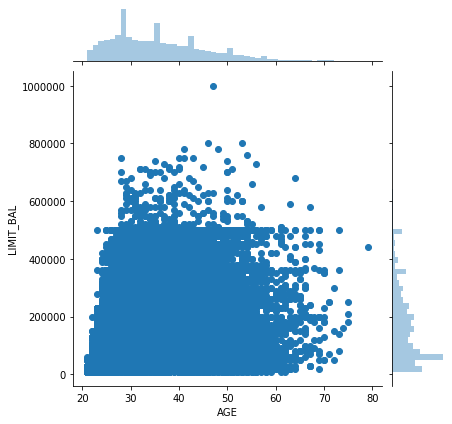

In [59]:
sns.jointplot(x = 'AGE', y = 'LIMIT_BAL', data = df)

In [60]:
# Average of eucation Vs Limit balance
# Creating fail and not fail dataframe
def_pay = df[df['def_pay'] == 1] #data frame when default pay = 1
not_def_pay = df[df['def_pay'] == 0] #data frame when default pay = 0

def_pay.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,def_pay
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
13,70000,1,2,2,30,1,2,2,0,0,...,66782,36137,36894,3200,0,3000,3000,1500,0,1
16,20000,1,1,2,24,0,0,2,2,2,...,18338,17905,19104,3200,0,1500,0,1650,0,1
21,120000,2,2,1,39,-1,-1,-1,-1,-1,...,0,632,316,316,316,0,632,316,0,1


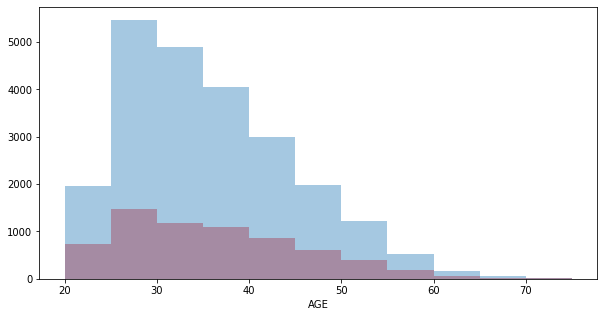

In [61]:

fig,ax = plt.subplots(1,1,figsize = (10,5))
bins = np.arange(20,80,5)
sns.distplot(def_pay['AGE'], color = 'red',bins = bins, ax = ax, kde = False)
sns.distplot(not_def_pay['AGE'],bins = bins, ax = ax, kde = False)

#Insights: Histogram of Age indicates that Age group from 25- 35 yrs are the majority of number of clients 
in both default(red) and non default(blue) paymnet types. 

In [62]:
df['AGEBUCKET'] = pd.cut(df['AGE'],bins)

In [63]:
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,def_pay,AGEBUCKET
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,689,0,0,0,0,1,"(20, 25]"
1,120000,2,2,2,26,-1,2,0,0,0,...,3455,3261,0,1000,1000,1000,0,2000,1,"(25, 30]"
2,90000,2,2,2,34,0,0,0,0,0,...,14948,15549,1518,1500,1000,1000,1000,5000,0,"(30, 35]"
3,50000,2,2,1,37,0,0,0,0,0,...,28959,29547,2000,2019,1200,1100,1069,1000,0,"(35, 40]"
4,50000,1,2,1,57,-1,0,-1,0,0,...,19146,19131,2000,36681,10000,9000,689,679,0,"(55, 60]"


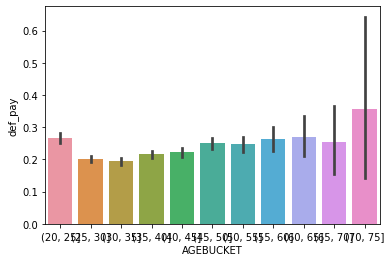

In [64]:
sns.barplot(x = 'AGEBUCKET', y = 'def_pay', data = df)


#Insight: Age group 20-25 and 70-75 years seems to have higher number of clients who have defaulted 
their payment methods.

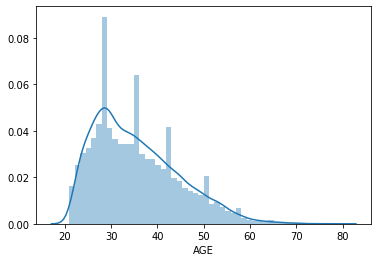

In [65]:
sns.distplot(not_def_pay['AGE'])

In [66]:
df['AGE'].describe()

count    30000.000000
mean        35.485500
std          9.217904
min         21.000000
25%         28.000000
50%         34.000000
75%         41.000000
max         79.000000
Name: AGE, dtype: float64

#Insights: With ta mean of ~35 yrs, Distribution not defaulted cases w.r.t. age group shows that majority of clients from age group 26-35 
yrs have not defaulted their paymnet method.And age group in their early 20's and 60's
have defaulted their paymnet methods. 

In [67]:

# Creating fail and not fail dataframe
def_pay = df[df['def_pay'] == 1] #data frame when default pay = 1
not_def_pay = df[df['def_pay'] == 0] #data frame when default pay = 0

def_pay.describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,def_pay
count,6636.000000,6636.000000,6636.000000,6636.000000,6636.000000,6636.000000,6636.000000,6636.000000,6636.000000,6636.000000,...,6636.000000,6636.000000,6636.000000,6636.000000,6636.000000,6636.000000,6636.000000,6636.000000,6636.000000,6636.0
mean,130109.656420,1.567058,1.894665,1.528029,35.725738,0.668174,0.458258,0.362116,0.254521,0.167872,...,42036.950573,39540.190476,38271.435503,3397.044153,3388.649638,3367.351567,3155.626733,3219.139542,3441.482068,1.0
std,115378.540571,0.495520,0.728096,0.525433,9.693438,1.383252,1.502243,1.499401,1.508535,1.482833,...,64351.076092,61424.695949,59579.674268,9544.252427,11737.986064,12959.624486,11191.973162,11944.731175,13464.005894,0.0
min,10000.000000,1.000000,1.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-65167.000000,-53007.000000,-339603.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,...,2141.500000,1502.750000,1150.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
50%,90000.000000,2.000000,2.000000,2.000000,34.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,19119.500000,18478.500000,18028.500000,1636.000000,1533.500000,1222.000000,1000.000000,1000.000000,1000.000000,1.0
75%,200000.000000,2.000000,2.000000,2.000000,42.000000,2.000000,2.000000,2.000000,2.000000,0.000000,...,50175.750000,47853.000000,47424.000000,3478.250000,3309.750000,3000.000000,2939.250000,3000.000000,2974.500000,1.0
max,740000.000000,2.000000,6.000000,3.000000,75.000000,8.000000,7.000000,8.000000,8.000000,8.000000,...,548020.000000,547880.000000,514975.000000,300000.000000,358689.000000,508229.000000,432130.000000,332000.000000,345293.000000,1.0


In [68]:
not_def_pay.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
LIMIT_BAL,23364.0,178099.726074,131628.359660,10000.0,70000.00,150000.0,250000.00,1000000.0
SEX,23364.0,1.614150,0.486806,1.0,1.00,2.0,2.00,2.0
EDUCATION,23364.0,1.841337,0.806780,0.0,1.00,2.0,2.00,6.0
MARRIAGE,23364.0,1.558637,0.520794,0.0,1.00,2.0,2.00,3.0
AGE,23364.0,35.417266,9.077355,21.0,28.00,34.0,41.00,79.0
PAY_0,23364.0,-0.211222,0.952464,-2.0,-1.00,0.0,0.00,8.0
PAY_2,23364.0,-0.301917,1.035191,-2.0,-1.00,0.0,0.00,8.0
PAY_3,23364.0,-0.316256,1.048378,-2.0,-1.00,0.0,0.00,8.0
PAY_4,23364.0,-0.355633,1.013162,-2.0,-1.00,0.0,0.00,8.0
PAY_5,23364.0,-0.389488,0.977591,-2.0,-1.00,0.0,0.00,7.0


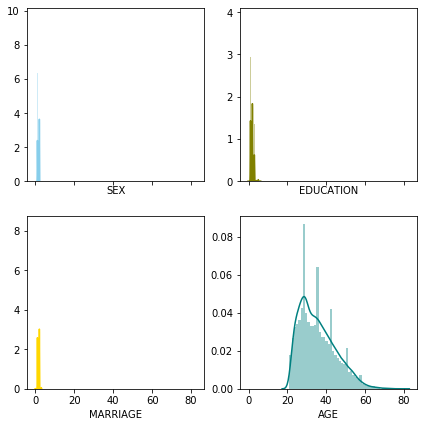

In [69]:
# plot just for practice.
f, axes = plt.subplots(2, 2, figsize=(7, 7), sharex=True)
sns.distplot( df['SEX'] , color="skyblue", ax=axes[0, 0])
sns.distplot( df['EDUCATION'] , color="olive", ax=axes[0, 1])
sns.distplot( df['MARRIAGE'] , color="gold", ax=axes[1, 0])
sns.distplot( df['AGE'] , color="teal", ax=axes[1, 1])


## EDA Summary : 

Out of 30,000 cases, 23364(~77.8%)had not defaulted their paymnet method and only 6636(~22%)cases 
had defaulted their paymnet method. 

1) EDUCATION: Key Insights: Box plot of Education vs Limit balance indicates that the median of limit 
        balance for both Default and Not default cases  is higher for clients who have graduate degrees. 
        Due to the imbalanced data structure, where number of cases with not default is ~16,728 counts higher 
        in not default group we can also see increasing varience in distribution of data for not_default group. 
        Clients with High School degree had comparatively lower credit limit than other groups for both default 
        and not default. 
        
2) SEX: Limit balance seems to be ~50,000 higher for clients who have not defaulted their paymnets 
    (both male and female)which could be due to significantly higher number of cases for not default group.
    As, per limit balance both male and female had approxmately equal amount of credit amounts in both default
    and not_default cases. Which also indicates that there was so disparity in limit balance w.r.t gender. 
    However, Overall destribution of data is much skewed for female than for male as there are more number of 
    outliers in female than in male. Which might be affected due to other various factors like job stability, 
    education levels and income.
    
3)MARRIAGE: With a median of ~$175,000 Limit Balance is comparatively higher in clients who is Married.
    Although, the graph shows higher limits for not default group in comparasion to default groups, 
    we should also consider the imbalance structure of dataset where number of cases for not_default is 
    significantly higher than that of default cases.
    
4) AGE: Histogram of Age indicates that Age group from 25- 35 yrs are the majority of number of clients 
in both default(red) and non default(blue) paymnet types.Distribution of not Default pay is widely spread 
where as in the case of  default pay, with the exceptions of few outliers most of the data are clustered tightly 
signifying the lone amount is less varied in default pay specially within age group 25-45 yrs. Limit balance 
is higher in age group from 25 to 45 years old.Age group 20-25 and 70-75 years seems to have higher number of 
clients who have defaulted their payment methods. With the mean of ~35 yrs, Distribution of not defaulted cases
w.r.t. age group shows that majority of clients from age group 25-45 yrs have not defaulted their paymnet method.
And age group in their early 20's and 60's have defaulted their paymnet methods.  

## One Hot Encoding

In [70]:
# Create a function to drop columns from a list if exists
def drop_cols(df, col_list):
    for column in col_list:
        try:
            df.drop(column, axis=1, inplace=True)
        except:
            continue

# Create dummy features function
def create_dummy(df, col, col_prefix):
    
    # Dummy df
    dummy = pd.get_dummies(df[col], prefix=col_prefix, drop_first=False)
    
    # Dummy column names to list
    dummy_cols = list(dummy)
    
    # To avoid concat duplicate dummy columns drop all dummy columns first
    drop_cols(df, dummy_cols)

    # Add new dummy features
    df_out = pd.concat([df, dummy], axis=1)
    
    print('Created dummy columns for', col)

    return df_out


In [71]:
# Creating Dummy columns for SEX, Education and Marriage. Seperating each variables w.r.t. its level or group and counting as 0 & 1.
df_new = df.copy()
dummy_cols = ['SEX','EDUCATION','MARRIAGE']
for col in dummy_cols:
     df_new = create_dummy(df_new, col, col)
    
df_new.head()

Created dummy columns for SEX
Created dummy columns for EDUCATION
Created dummy columns for MARRIAGE


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,EDUCATION_1,EDUCATION_2,EDUCATION_3,EDUCATION_4,EDUCATION_5,EDUCATION_6,MARRIAGE_0,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,1,0,0,0,0,0,1,0,0
1,120000,2,2,2,26,-1,2,0,0,0,...,0,1,0,0,0,0,0,0,1,0
2,90000,2,2,2,34,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
3,50000,2,2,1,37,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,0,1,0,0,0,0,0,1,0,0


In [72]:
# Dropping original Sex, Education and Marriage columns from the data frame.

df_dummy = df_new.drop(columns = ['SEX','EDUCATION','MARRIAGE'], axis = 1) 
df_dummy.head()

,LIMIT_BAL,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,...,EDUCATION_1,EDUCATION_2,EDUCATION_3,EDUCATION_4,EDUCATION_5,EDUCATION_6,MARRIAGE_0,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3
0,20000,24,2,2,-1,-1,-2,-2,3913,3102,...,0,1,0,0,0,0,0,1,0,0
1,120000,26,-1,2,0,0,0,2,2682,1725,...,0,1,0,0,0,0,0,0,1,0
2,90000,34,0,0,0,0,0,0,29239,14027,...,0,1,0,0,0,0,0,0,1,0
3,50000,37,0,0,0,0,0,0,46990,48233,...,0,1,0,0,0,0,0,1,0,0
4,50000,57,-1,0,-1,0,0,0,8617,5670,...,0,1,0,0,0,0,0,1,0,0


In [73]:
df_dummy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 35 columns):
LIMIT_BAL      30000 non-null int64
AGE            30000 non-null int64
PAY_0          30000 non-null int64
PAY_2          30000 non-null int64
PAY_3          30000 non-null int64
PAY_4          30000 non-null int64
PAY_5          30000 non-null int64
PAY_6          30000 non-null int64
BILL_AMT1      30000 non-null int64
BILL_AMT2      30000 non-null int64
BILL_AMT3      30000 non-null int64
BILL_AMT4      30000 non-null int64
BILL_AMT5      30000 non-null int64
BILL_AMT6      30000 non-null int64
PAY_AMT1       30000 non-null int64
PAY_AMT2       30000 non-null int64
PAY_AMT3       30000 non-null int64
PAY_AMT4       30000 non-null int64
PAY_AMT5       30000 non-null int64
PAY_AMT6       30000 non-null int64
def_pay        30000 non-null int64
AGEBUCKET      29999 non-null category
SEX_1          30000 non-null uint8
SEX_2          30000 non-null uint8
EDUCATION_0    30000 non

In [74]:
#sns.pairplot(df_dummy, hue = "LIMIT_BAL")

In [75]:
df_dummy.columns

Index(['LIMIT_BAL', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5',
       'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4',
       'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
       'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'def_pay', 'AGEBUCKET', 'SEX_1',
       'SEX_2', 'EDUCATION_0', 'EDUCATION_1', 'EDUCATION_2', 'EDUCATION_3',
       'EDUCATION_4', 'EDUCATION_5', 'EDUCATION_6', 'MARRIAGE_0', 'MARRIAGE_1',
       'MARRIAGE_2', 'MARRIAGE_3'],
      dtype='object')

In [76]:
df_dummy['def_pay'].value_counts() # 0 = not default and 1 = defaulted i.e ~22% was defaulted.

0    23364
1     6636
Name: def_pay, dtype: int64

# Logistic Regression

## 1) Splitting data into train and test data set

In [77]:
from sklearn.model_selection import train_test_split

In [78]:
df_dummy.columns

Index(['LIMIT_BAL', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5',
       'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4',
       'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
       'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'def_pay', 'AGEBUCKET', 'SEX_1',
       'SEX_2', 'EDUCATION_0', 'EDUCATION_1', 'EDUCATION_2', 'EDUCATION_3',
       'EDUCATION_4', 'EDUCATION_5', 'EDUCATION_6', 'MARRIAGE_0', 'MARRIAGE_1',
       'MARRIAGE_2', 'MARRIAGE_3'],
      dtype='object')

In [79]:
# or we can also do X = df_dummy.drop('def_pay', axis = 1)

X = df_dummy[['LIMIT_BAL', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5',
       'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4',
       'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
       'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'SEX_1',
       'SEX_2', 'EDUCATION_0', 'EDUCATION_1', 'EDUCATION_2', 'EDUCATION_3',
       'EDUCATION_4', 'EDUCATION_5', 'EDUCATION_6', 'MARRIAGE_0', 'MARRIAGE_1',
       'MARRIAGE_2', 'MARRIAGE_3']]
y = df_dummy['def_pay']

In [80]:
#split to male and female (), filter with male and female

In [81]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 101)

## 2)Train and fit Logistic Regression model on training set

In [107]:
import warnings
warnings.filterwarnings('ignore')

In [108]:
from sklearn.linear_model import LogisticRegression

In [109]:
#Creating instance of Logistic Regression model
log_model = LogisticRegression(class_weight = 'balanced')

In [110]:
#Fitting a model into train data set
log_model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

logmodel.fit(X_train, y_train)

## 3) Predictions and Evaluations (Predict values for testing data)

In [85]:
predictions = log_model.predict(X_test)

## 4) Create Classification report for the model

In [86]:
from sklearn.metrics import classification_report, confusion_matrix

In [87]:
print(classification_report(y_test, predictions))
print(confusion_matrix(y_test, predictions))

              precision    recall  f1-score   support

           0       0.87      0.67      0.76      7058
           1       0.35      0.63      0.45      1942

    accuracy                           0.66      9000
   macro avg       0.61      0.65      0.60      9000
weighted avg       0.76      0.66      0.69      9000

[[4729 2329]
 [ 710 1232]]


In [88]:
from sklearn.metrics import recall_score

In [89]:
recall_score(y_test, predictions)

0.6343975283213182

## Insights Logistic regression Model: 
Classification report of test data set shows that Accuracy of predictions is ~66% for default pay. However with 
the precision of(35%) and F1 score of (45%) for default payment we can not take this model as best model for
prediction. For,better judjement we will have to look into other models come to the conclusion after comparing 
both models. 

Confusion Matrix: Shows the ratio of True predictions of default paymnet are (4729 + 1232)/(2329 + 710) = 1.96. 
    Which means for every 1.96 true prediction there were 1 false prediction.

# Random Forest Classifier Model

In [90]:
# Import model and metric
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Initialize the classifier 
rfc = RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=8, max_features='sqrt',
                             random_state=400, class_weight = 'balanced')

# Fit baseline model 
rfc.fit(X_train, y_train)

rfc_pred = rfc.predict(X_test)

rfc_score = accuracy_score(y_test, rfc_pred) 

print(f"Baseline model accuracy is {rfc_score*100:,.2f}%")

Baseline model accuracy is 78.50%


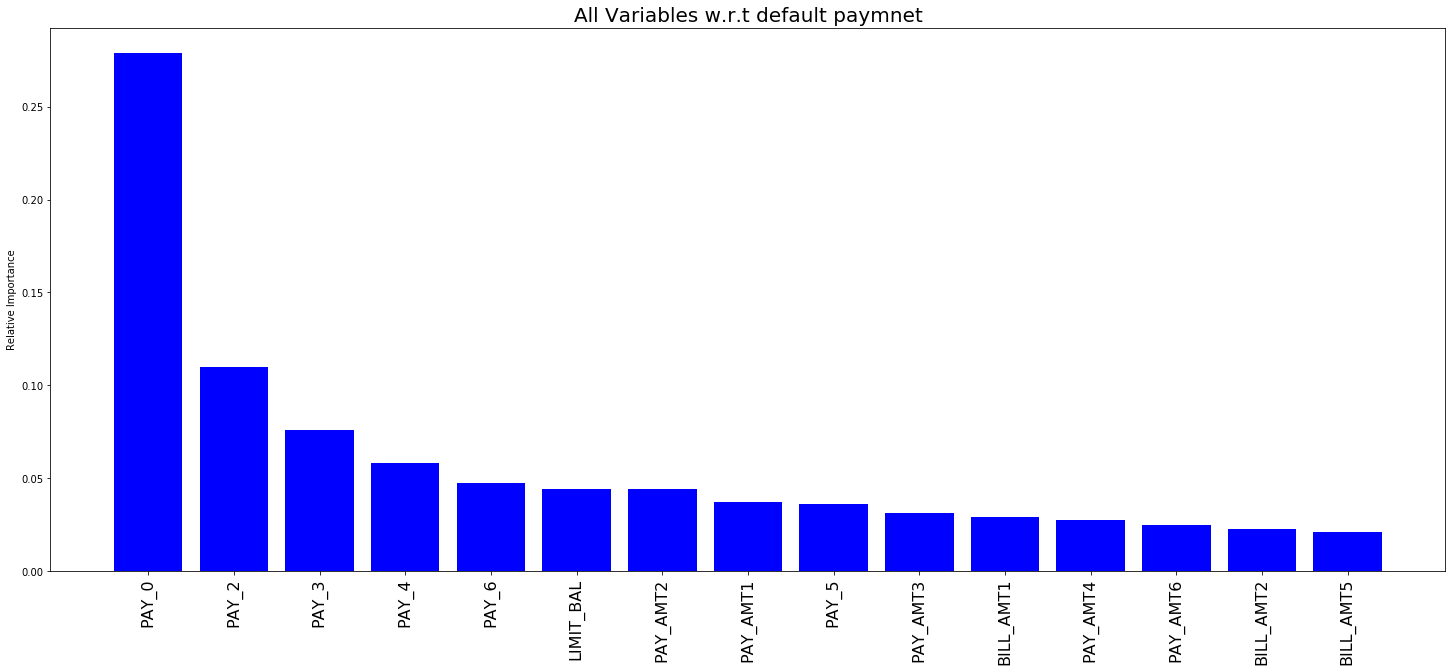

In [91]:
# Plot Feature Importances
fig, ax = plt.subplots(1,1, figsize=(25,10)) 
final_features = X.columns 

importances = rfc.feature_importances_  
indices = np.argsort(importances)[::-1][:15] # numpy methot to sort might need to chang e 15
plt.title('Feature Importances')
ax.bar(range(len(indices)), importances[indices], color='b')
plt.xticks(range(len(indices)), [final_features[i] for i in indices], rotation=90, size=16)
plt.ylabel('Relative Importance')
plt.title('All Variables w.r.t default paymnet', size=20)
plt.show()

##Key insights: Out of all the paymnet methods, Pay_0 = Pay duely had the highest relative score towards default pay, which indicates majority clients paid their amount on time. 

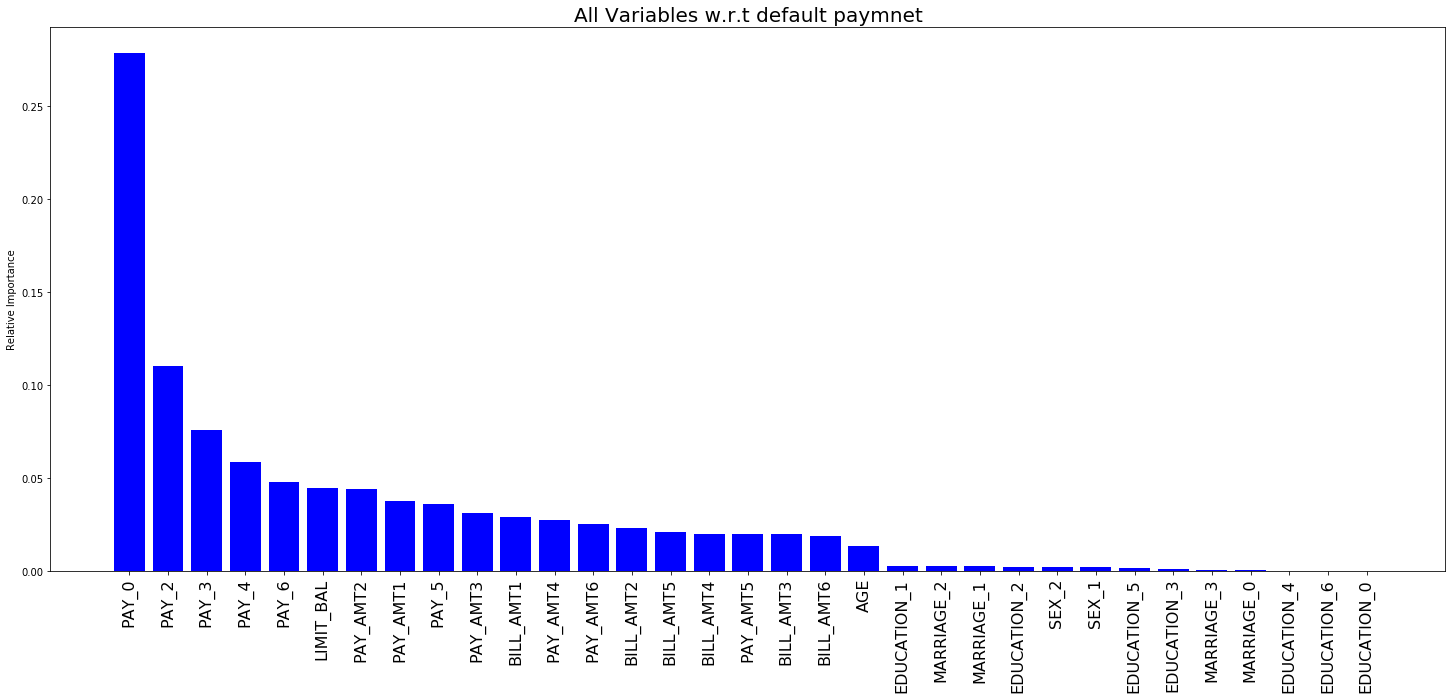

In [92]:
# Plot Feature Importances
fig, ax = plt.subplots(1,1, figsize=(25,10)) 
final_features = X.columns 

importances = rfc.feature_importances_ 
indices = np.argsort(importances)[::-1]#[:15] # numpy methot to sort might need to chang e 15
plt.title('Feature Importances')
ax.bar(range(len(indices)), importances[indices], color='b')
plt.xticks(range(len(indices)), [final_features[i] for i in indices], rotation=90, size=16)
plt.ylabel('Relative Importance')
plt.title('All Variables w.r.t default paymnet', size=20)
plt.show()

In [ ]:
# Key Insight: 

In [93]:
# create seperate plot for numeric and non numeric variables

In [94]:
print(classification_report(y_test, rfc_pred))
print('\n')
print(confusion_matrix(y_test, rfc_pred))

              precision    recall  f1-score   support

           0       0.88      0.84      0.86      7058
           1       0.50      0.59      0.54      1942

    accuracy                           0.79      9000
   macro avg       0.69      0.71      0.70      9000
weighted avg       0.80      0.79      0.79      9000



[[5922 1136]
 [ 799 1143]]


In [99]:
df_dummy['def_pay'].value_counts()

0    23364
1     6636
Name: def_pay, dtype: int64

## Insights Random Forest Classifier Model: 
Classification report of test data set shows that Accuracy of predictions is ~79% for default pay. However with 
the precision of(50%) and F1 score of (54%) for default payment we can not take this model as best model for
prediction. For,better judjement we will have to look into other models and come to the conclusion after comparing 
both models. 

Confusion Matrix: Shows the ratio of True predictions/ False predictions of default paymnet are 
    (5922 + 1143)/(1136 + 799) = ~3.65. Which means for every 3.65 true prediction there were 1 false prediction.

# Decision Tree Clasifier Model

In [100]:
from sklearn.tree import DecisionTreeClassifier

In [101]:
#Creating instance of Decision Tree Classifier
dtree = DecisionTreeClassifier(class_weight = 'balanced')

In [102]:
dtree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [103]:
pred_dtree = dtree.predict(X_test)

In [104]:
print(classification_report(y_test, pred_dtree))
print('\n')
print(confusion_matrix(y_test, pred_dtree))


              precision    recall  f1-score   support

           0       0.83      0.83      0.83      7058
           1       0.39      0.39      0.39      1942

    accuracy                           0.74      9000
   macro avg       0.61      0.61      0.61      9000
weighted avg       0.74      0.74      0.74      9000



[[5860 1198]
 [1183  759]]


In [ ]:
# 0= not default, 1 = defaulted. 1209 = false positive, 1185 = false negative , so in total of 30,000 cases we are misscoding 2394 cases which is  ~79.8% being mislabelled. 

## Insights Decision Tree Classifier Model: 
Classification report: of test data set shows that Accuracy of predictions is ~74% for default pay. However with 
the precision of(39%) and F1 score of (39%) for default payment we can not take this model as best model for
prediction. For,better judjement we will have to look into other models come to the conclusion after comparing 
both models. 

Confusion Matrix: Shows the ratio of True predictions of default paymnet are (5860 + 759)/(1198 + 1183) = ~2.78. 
    Which means for every 2.78 true prediction there were 1 false prediction.

## Summary of Prediction Models:
Out of all three models ( Lofistic Regression, Decision Tree and Random Forest Classification model),
Random Forest Classifier model had higher Accuracy (~79%),Higher Precission(~50%) higher Recall value (~59) and
higher F1 score(~54). The ratio of true predictions vs false predictions were (~3.65) also higher in
Random Forest model. Hence, random Forest Classifier is the better performing model for this case study. 

However the, predictions made in the case of Not default group(0) were comparatively more accurate than that of default group (1). Considering , the significant differeance in number of data count in not default ('0' = 23364) and default group('1' = 6636) it is very likely that predictions will be more accurate in not_default cases (0) than that of default(1) cases. To overcome this inconsistancy in result we will have to increase the number of cases for default pay or conduct an individul predictions for default and not default group.



## ROC Curves for Classification  for Logistic Regression in Python
##Two diagnostic tools that help in the interpretation of probabilistic forecast for binary (two-class) 
classification predictive modeling problems are ROC Curves and Precision-Recall curves.

 ROC Plot : It is a plot of the false positive rate (x-axis) versus the true positive rate (y-axis) for a number of different candidate threshold values between 0.0 and 1.0. Put another way, it plots the false alarm rate versus the hit rate. It is the measure of True positive rate or sensitivity.
 True positive rate = True Positives / (True Positives + False Negatives)

It is also called the false alarm rate as it summarizes how often a positive class is predicted when the actual outcome is negative.

False Positive Rate OR Specificity = False Positives(True Negative) / (False Positives + True Negatives)


 


In [111]:
import warnings
warnings.filterwarnings('ignore')

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.651


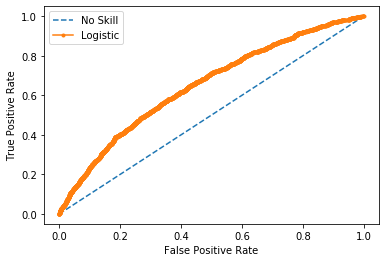

In [112]:
# roc curve and auc
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]

model = LogisticRegression(solver='lbfgs')
model.fit(X_train, y_train)
# predict probabilities
lr_probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()


## Precision-Recall Curves:
Precision is a ratio of the number of true positives divided by the sum of the true positives and false positives. It describes how good a model is at predicting the positive class. Precision is referred to as the positive predictive value.

Positive Predictive Power = True Positives / (True Positives + False Positives)

Precision = True Positives / (True Positives + False Positives)

Recall = True Positives / (True Positives + False Negatives)


Sensitivity = True Positives / (True Positives + False Negatives)

Recall == Sensitivity


Logistic: f1=0.002 auc=0.333


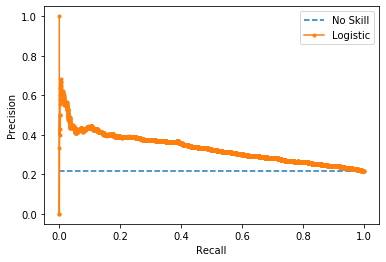

In [58]:
# precision-recall curve and f1
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from matplotlib import pyplot

# predict class values
yhat = model.predict(X_test)
lr_precision, lr_recall, _ = precision_recall_curve(y_test, lr_probs)
lr_f1, lr_auc = f1_score(y_test, yhat), auc(lr_recall, lr_precision)
# summarize scores
print('Logistic: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
# plot the precision-recall curves
no_skill = len(y_test[y_test==1]) / len(y_test)
pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
pyplot.plot(lr_recall, lr_precision, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

# Thank you !!